 due to optimization of time to process the code,we didn´t include all graphs and exploratory analysis 


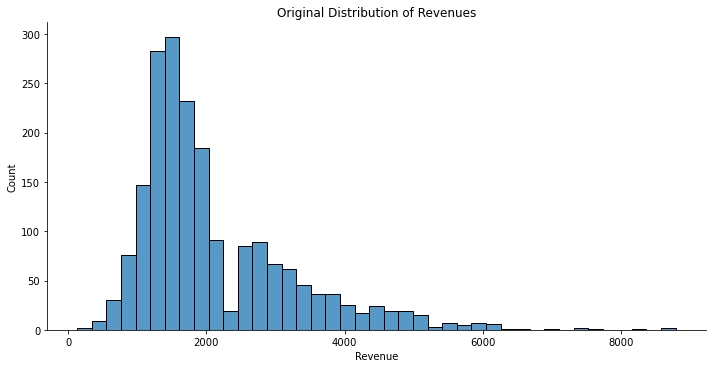

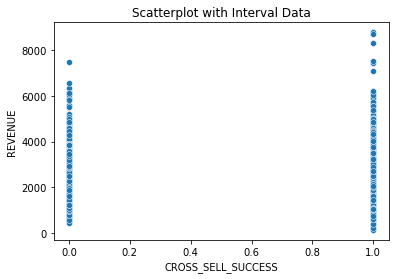

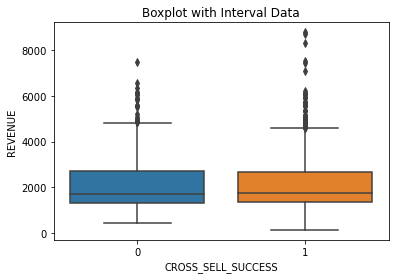

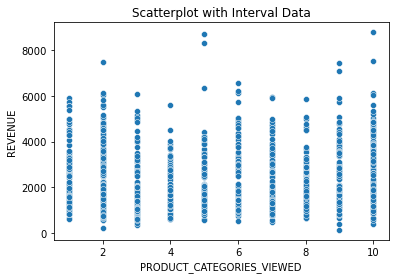

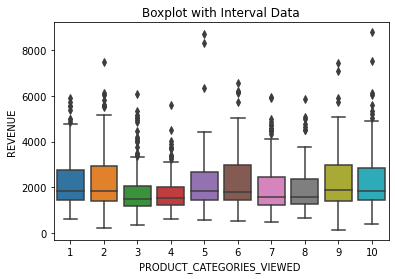

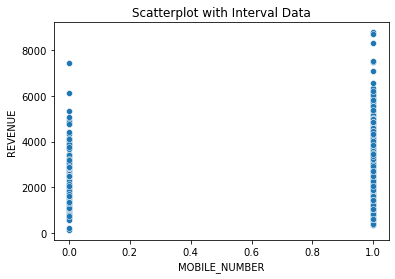

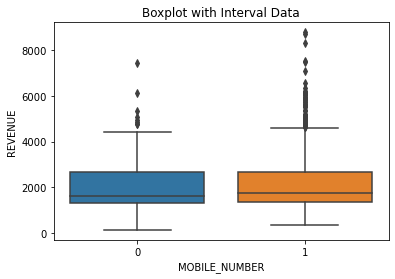

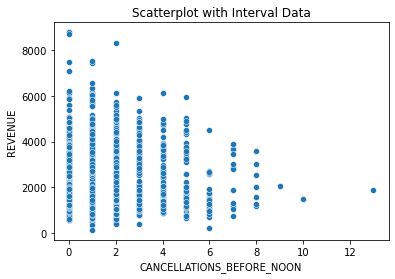

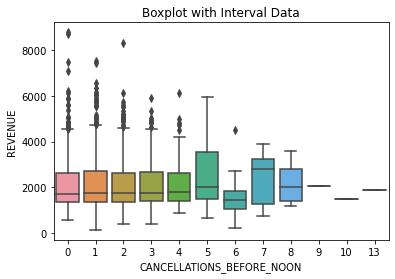



Count  cancelations

----------
Cancelations before Noon
----------
0     667
1     567
2     331
3     189
4     105
5      43
6      23
7      11
8       7
9       1
10      1
13      1
Name: CANCELLATIONS_BEFORE_NOON, dtype: int64


----------
Cancelations after noon
----------
0    1667
1     238
2      38
3       3
Name: CANCELLATIONS_AFTER_NOON, dtype: int64





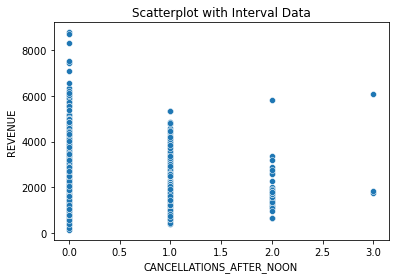

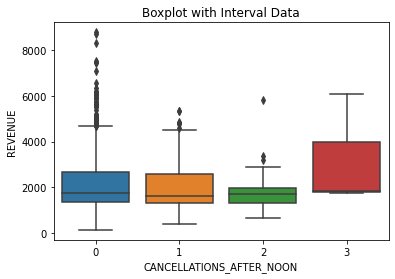

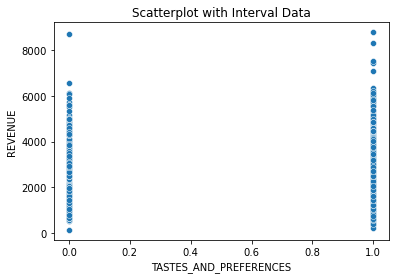

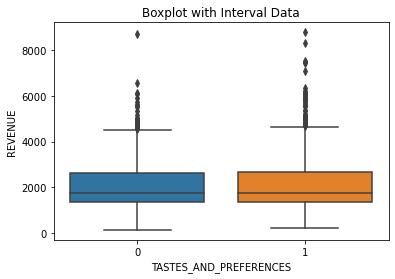

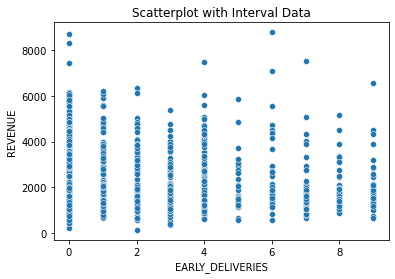

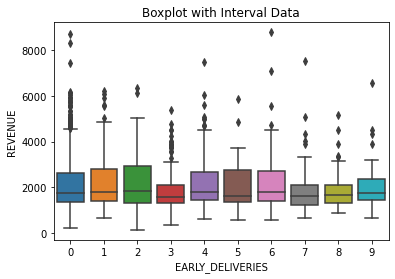

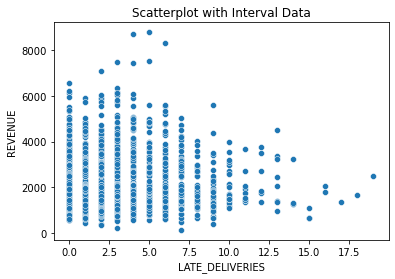

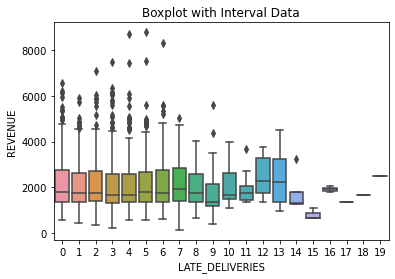

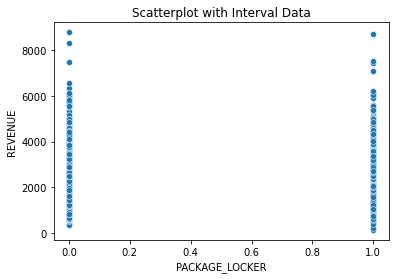

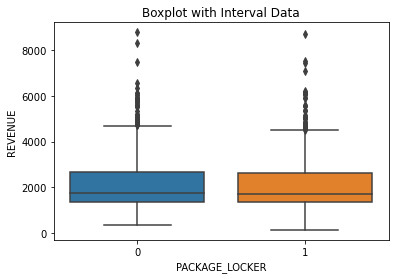

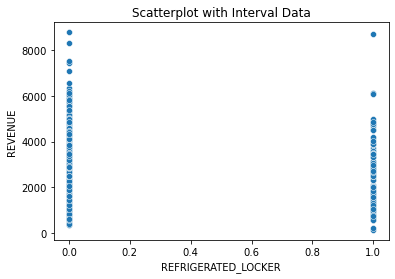

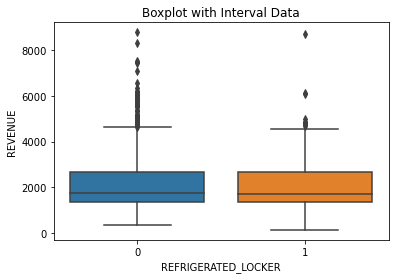

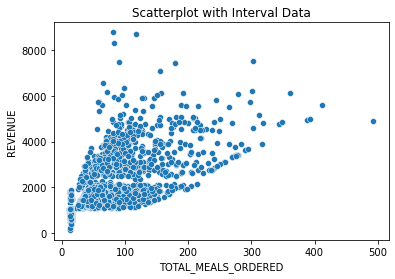

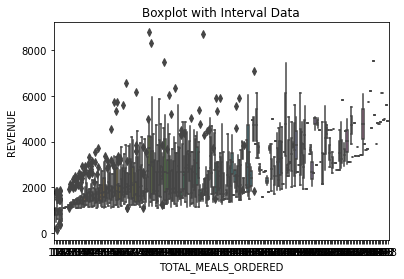

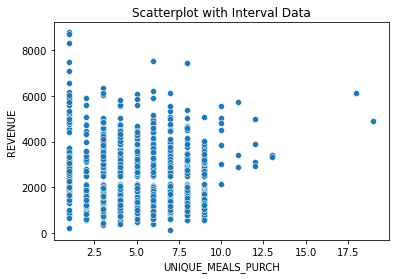

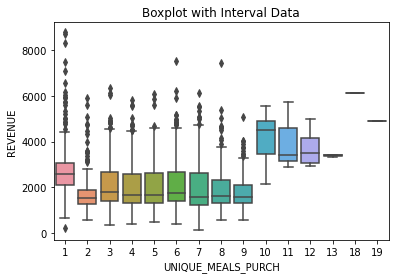

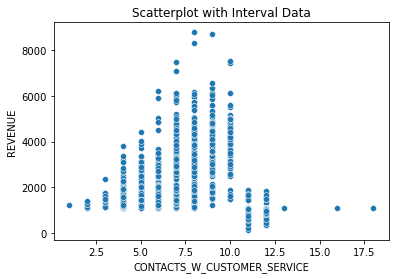

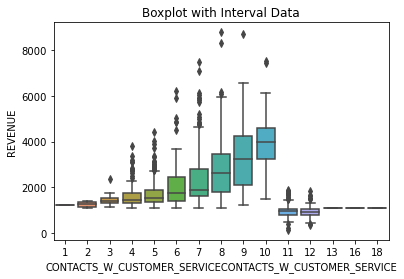

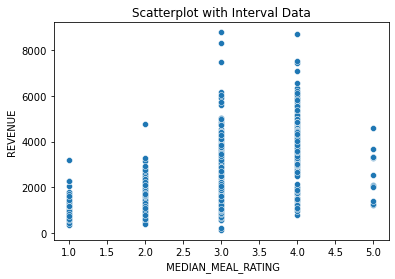

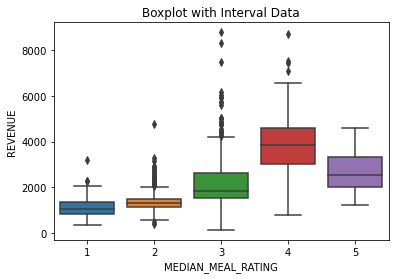


Training Data
-------------
X-side: (1459, 36)
y-side: (1459,)


Testing Data
------------
X-side: (487, 36)
y-side: (487,)

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     337.9
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        08:43:54   Log-Likelihood:                 1230.1
No. Observations:                1459   AIC:                            -2432.
Df Residuals:                    1445   BIC:                            -2358.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import gender_guesser.detector as gender 
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
import sklearn.linear_model # linear models

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = './datasets/Apprentice_Chef_Dataset.xlsx'

##############################
#Observation

print(f""" due to optimization of time to process the code,we didn´t include all graphs and exploratory analysis """)

# reading the file into Python
AppChef = pd.read_excel(file)
AppChef.shape


AppChef.head(n = 5)

#due to optimization of time to process the code, graphs and exploratory analysis are not included


# developing a histogram using DISPLOT
sns.displot(data   = AppChef,
            x      = 'REVENUE',
            height = 5,
            aspect = 2)



plt.title(label   = "Original Distribution of Revenues")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()


AppChef.isnull().sum(axis = 0)


#######
#Creating new variables

AppChef['log_REVENUE'] = np.log10(AppChef['REVENUE'])
AppChef['log_TOTAL_MEALS_ORDERED'] = np.log10(AppChef['TOTAL_MEALS_ORDERED'])
AppChef['log_UNIQUE_MEALS_PURCH'] = np.log10(AppChef['UNIQUE_MEALS_PURCH'])
AppChef['log_PRODUCT_CATEGORIES_VIEWED'] = np.log10(AppChef['PRODUCT_CATEGORIES_VIEWED'])
AppChef['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(AppChef['AVG_TIME_PER_SITE_VISIT'])

AppChef['Total_Login'] =  (AppChef['PC_LOGINS']) * (AppChef['MOBILE_LOGINS'])
AppChef['avg_Total_Login'] =  (AppChef['PC_LOGINS'] + (AppChef['MOBILE_LOGINS']))/2

AppChef['DELIVERIES'] =  ((AppChef['LATE_DELIVERIES']) + (AppChef['EARLY_DELIVERIES']))+1
AppChef['log_DELIVERIES'] = np.log10(AppChef['DELIVERIES'])

AppChef['CANCELATIONS'] =  ((AppChef['CANCELLATIONS_BEFORE_NOON']) + (AppChef['CANCELLATIONS_AFTER_NOON']))+1
AppChef['log_CANCELATIONS'] = np.log10(AppChef['CANCELATIONS'])
AppChef['log_PRODUCT_CATEGORIES_VIEWED'] = np.log10(AppChef['PRODUCT_CATEGORIES_VIEWED'])


#####################
#INTERVAL VARIABLES

# developing a scatterplot
sns.scatterplot(x    = 'CROSS_SELL_SUCCESS',
                y    = 'REVENUE',
                data = AppChef)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'CROSS_SELL_SUCCESS')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()
##############################################

# developing a boxplot
sns.boxplot(x    = 'CROSS_SELL_SUCCESS',
            y    = 'REVENUE',
            data = AppChef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CROSS_SELL_SUCCESS')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()


#PRODUCT CATEGORIES VIEWED

# developing a scatterplot
sns.scatterplot(x    = 'PRODUCT_CATEGORIES_VIEWED',
                y    = 'REVENUE',
                data = AppChef)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'PRODUCT_CATEGORIES_VIEWED')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()
##############################################

# developing a boxplot
sns.boxplot(x    = 'PRODUCT_CATEGORIES_VIEWED',
            y    = 'REVENUE',
            data = AppChef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PRODUCT_CATEGORIES_VIEWED ')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()
#calculate correlation
log_corr = AppChef.loc[ : , ['PRODUCT_CATEGORIES_VIEWED',
                             'log_PRODUCT_CATEGORIES_VIEWED',
                             'REVENUE',
                             'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['PRODUCT_CATEGORIES_VIEWED', 'log_PRODUCT_CATEGORIES_VIEWED'],
              ['REVENUE', 'log_REVENUE']   ]


#INTERVAL VARIABLES

# developing a scatterplot
sns.scatterplot(x    = 'MOBILE_NUMBER',
                y    = 'REVENUE',
                data = AppChef)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'MOBILE_NUMBER')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()


# developing a boxplot
sns.boxplot(x    = 'MOBILE_NUMBER',
            y    = 'REVENUE',
            data = AppChef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MOBILE_NUMBER')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()


#INTERVAL VARIABLES

# developing a scatterplot
sns.scatterplot(x    = 'CANCELLATIONS_BEFORE_NOON',
                y    = 'REVENUE',
                data = AppChef)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'CANCELLATIONS_BEFORE_NOON')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()
##############################################

# developing a boxplot
sns.boxplot(x    = 'CANCELLATIONS_BEFORE_NOON',
            y    = 'REVENUE',
            data = AppChef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CANCELLATIONS_BEFORE_NOON')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()


# printing value counts for cancelations
print(f"""

Count  cancelations
==================

----------
Cancelations before Noon
----------
{AppChef['CANCELLATIONS_BEFORE_NOON'].value_counts(normalize = False).sort_index()}


----------
Cancelations after noon
----------
{AppChef['CANCELLATIONS_AFTER_NOON'].value_counts(normalize = False).sort_index()}


""")



#INTERVAL VARIABLES

# developing a scatterplot
sns.scatterplot(x    = 'CANCELLATIONS_AFTER_NOON',
                y    = 'REVENUE',
                data = AppChef)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'CANCELLATIONS_AFTER_NOON')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()
##############################################

# developing a boxplot
sns.boxplot(x    = 'CANCELLATIONS_AFTER_NOON',
            y    = 'REVENUE',
            data = AppChef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CANCELLATIONS_AFTER_NOON')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()


#INTERVAL VARIABLES

# developing a scatterplot
sns.scatterplot(x    = 'TASTES_AND_PREFERENCES',
                y    = 'REVENUE',
                data = AppChef)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'TASTES_AND_PREFERENCES')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()
##############################################

# developing a boxplot
sns.boxplot(x    = 'TASTES_AND_PREFERENCES',
            y    = 'REVENUE',
            data = AppChef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'TASTES_AND_PREFERENCES')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()


#INTERVAL VARIABLES

# developing a scatterplot
sns.scatterplot(x    = 'EARLY_DELIVERIES',
                y    = 'REVENUE',
                data = AppChef)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'EARLY_DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()
##############################################

# developing a boxplot
sns.boxplot(x    = 'EARLY_DELIVERIES',
            y    = 'REVENUE',
            data = AppChef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'EARLY_DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()


#INTERVAL VARIABLES

# developing a scatterplot
sns.scatterplot(x    = 'LATE_DELIVERIES',
                y    = 'REVENUE',
                data = AppChef)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'LATE_DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()
##############################################

# developing a boxplot
sns.boxplot(x    = 'LATE_DELIVERIES',
            y    = 'REVENUE',
            data = AppChef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'LATE_DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()


#INTERVAL VARIABLES

# developing a scatterplot
sns.scatterplot(x    = 'PACKAGE_LOCKER',
                y    = 'REVENUE',
                data = AppChef)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'PACKAGE_LOCKER')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()
##############################################

# developing a boxplot
sns.boxplot(x    = 'PACKAGE_LOCKER',
            y    = 'REVENUE',
            data = AppChef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PACKAGE_LOCKER')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()


#INTERVAL VARIABLES

# developing a scatterplot
sns.scatterplot(x    = 'REFRIGERATED_LOCKER',
                y    = 'REVENUE',
                data = AppChef)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'REFRIGERATED_LOCKER')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()
##############################################

# developing a boxplot
sns.boxplot(x    = 'REFRIGERATED_LOCKER',
            y    = 'REVENUE',
            data = AppChef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'REFRIGERATED_LOCKER')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()

#INTERVAL VARIABLES

# developing a scatterplot
sns.scatterplot(x    = 'TOTAL_MEALS_ORDERED',
                y    = 'REVENUE',
                data = AppChef)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()
##############################################

# developing a boxplot
sns.boxplot(x    = 'TOTAL_MEALS_ORDERED',
            y    = 'REVENUE',
            data = AppChef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()

#INTERVAL VARIABLES

# developing a scatterplot
sns.scatterplot(x    = 'UNIQUE_MEALS_PURCH',
                y    = 'REVENUE',
                data = AppChef)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()
##############################################

# developing a boxplot
sns.boxplot(x    = 'UNIQUE_MEALS_PURCH',
            y    = 'REVENUE',
            data = AppChef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()


#INTERVAL VARIABLES

# developing a scatterplot
sns.scatterplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
                y    = 'REVENUE',
                data = AppChef)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()
##############################################

# developing a boxplot
sns.boxplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
            y    = 'REVENUE',
            data = AppChef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICECONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()


#INTERVAL VARIABLES

# developing a scatterplot
sns.scatterplot(x    = 'MEDIAN_MEAL_RATING',
                y    = 'REVENUE',
                data = AppChef)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = ' MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()
##############################################

# developing a boxplot
sns.boxplot(x    = 'MEDIAN_MEAL_RATING',
            y    = 'REVENUE',
            data = AppChef)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()



######################
##CREATING MODEL
####################




continuous_data = ['REVENUE','AVG_PREP_VID_TIME', 'AVG_TIME_PER_SITE_VISIT']


# developing a correlation matrix based on continuous features
AppChef_corr = AppChef[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
AppChef_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)


#missing values

fill = 'Chef'


# filling missing values of FAMILY NAME, to know which are we are using "Chef"
AppChef['FAMILY_NAME'] = AppChef['FAMILY_NAME'].fillna(fill)


# engineering email

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in AppChef.iterrows():
    
    # splitting email domain at '@'
    split_email = AppChef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# renaming column to concatenate
email_df.columns = ['0' , 'personal_email_domain']


# concatenating personal_email_domain with friends DataFrame
AppChef = pd.concat([AppChef, email_df['personal_email_domain']],
                     axis = 1)


# printing value counts of personal_email_domain
AppChef.loc[: ,'personal_email_domain'].value_counts()


# email domain types
personal_mail = ['gmail.com', 'protonmail.com','yahoo.com','msn.com','aol.com','passport.com','hotmail',
                'live.com','me.com']
professional_mail  = ['amex.com','merck.com','mcdonalds.com','jnj.com','cocacola.com','nike.com',
                      'apple.com','ibm.com','dupont.com','ge.org','microsoft.com','chevron.com',
                      'travelers.com','exxon.com','unitedhealth.com','boeing.com','caterpillar.com',
                      'verizon.com','mmm.com','pg.com','disney.com','walmart.com','visa.com','pfizer.com',
                      'jpmorgan.com','goldmansacs.com','cisco.com','unitedtech.com','intel.com','homedepot.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type, personal, professional, junk
for domain in AppChef['personal_email_domain']:
    
    if domain in personal_mail:
        placeholder_lst.append('personal')
        

    elif domain in professional_mail:
        placeholder_lst.append('professional')


    else:
        placeholder_lst.append('Junk')

AppChef = pd.concat([AppChef, pd.Series(placeholder_lst)],
                     axis = 1)


# one hot encoding categorical variables
one_hot_mail       = pd.get_dummies(AppChef[0])
# dropping categorical variables after they've been encoded
AppChef = AppChef.drop(0, axis = 1)


# joining codings together
AppChef = AppChef.join([one_hot_mail])


# preparing explanatory variable data
#delete variables that we are not going to use
AppChef_data   = AppChef.drop(['REVENUE',
                               'log_REVENUE', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME',
                              'personal_email_domain'],
                               axis = 1)
# AppChef is my X, so delete the values i am not using and the y values

# x-variables
x_variables = ['CROSS_SELL_SUCCESS','CONTACTS_W_CUSTOMER_SERVICE','TASTES_AND_PREFERENCES',
               'AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED','MEDIAN_MEAL_RATING',
               'TOTAL_PHOTOS_VIEWED','Junk','personal','professional','log_TOTAL_MEALS_ORDERED',
                                        'log_UNIQUE_MEALS_PURCH','UNIQUE_MEALS_PURCH']

# response variables
AppChef_target = AppChef.loc[ : , 'REVENUE']
log_AppChef_target = AppChef.loc[ : ,'log_REVENUE']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
            AppChef_data,
            log_AppChef_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


#merging X_train and y_train so that they can be used in statsmodels
AppChef_train = pd.concat([x_train, y_train], axis = 1)


# building model
lm_best = smf.ols(formula =  """log_REVENUE ~ CROSS_SELL_SUCCESS +
                                        CONTACTS_W_CUSTOMER_SERVICE +
                                        TASTES_AND_PREFERENCES +
                                        AVG_PREP_VID_TIME +
                                        LARGEST_ORDER_SIZE +
                                        MASTER_CLASSES_ATTENDED +
                                        MEDIAN_MEAL_RATING +
                                        TOTAL_PHOTOS_VIEWED +
                                        Junk +
                                        personal +
                                        professional +
                                        log_TOTAL_MEALS_ORDERED +
                                        log_UNIQUE_MEALS_PURCH +
                                        UNIQUE_MEALS_PURCH
                                        """,
                                data = AppChef_train)


# fitting model
results = lm_best.fit()



# Summary
print(results.summary())



# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data   = AppChef.loc[ : , x_variables]


# Preparing the target variable
AppChef_target = AppChef.loc[ : , 'REVENUE']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            AppChef_data,     # x-variables
            AppChef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            AppChef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)



# INSTANTIATING a liner model
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)

print(f"""\nOLS\n""") 

# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print(f"""OLS Train-Test Gap:{ abs(lr_train_score - lr_test_score).round(4)}""")
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

# zipping each feature name to its coefficient
lr_model_values = zip(AppChef_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]

print(f"""\nOLS Coefficients\n""") 


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)
    
  

    
print(f"""\nLASSO\n""") 

lasso_model = sklearn.linear_model.Lasso(alpha     = 1.0,  # default shrinkage
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)


print(f"""\nLASSO Coeficients\n""") 

lasso_model_values = zip(AppChef_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)
    
print(f"""\nADR\n""") 

# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)



print(f"""\nADR Coefficients\n""") 

# zipping each feature name to its coefficient
ard_model_values = zip(AppChef_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    
    
            
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)        
    

    
#### Comparative Table

print(f"""
Model      Training Score    Testing Score  Train-Test Gap    ModelSize         
-----      -----------      ----------      ----------      ----------      
OLS        {lr_train_score}            {lr_test_score}            {lr_test_gap}            {len(lr_model_lst)}    
Lasso      {lasso_train_score}            {lasso_test_score}             {lasso_test_gap}            {len(lasso_model_lst)}
ARD        {ard_train_score}            {ard_test_score}            {ard_test_gap}            {len(ard_model_lst)}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training Score' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing Score'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

print(model_performance)


# sending model results to Excel
model_performance.to_excel('./linear_model_A1_Regression_Analysis.xlsx',
                           index = False)

In [3]:
AppChef_corr['REVENUE'].sort_values(ascending = False)

REVENUE                    1.000000
AVG_PREP_VID_TIME          0.643580
AVG_TIME_PER_SITE_VISIT    0.144572
Name: REVENUE, dtype: float64

Comments

We can observed that OLS is the one is the better, even that ARD Score are 
higher, OLS has the lowe GAP between the training and testing.


Likewise, the coefficients of the variables of each model can be observed, 
it can be observed in the code or in the excel file, for a better view